## Distributed parallel RMSD calculation with pytraj 

#### Load python modules

In [1]:
import pytraj as pt
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

#### Change directory to the location of the trajectory file.

In [2]:
%cd ~/workshop_pytraj/example_02

/home/user090/workshop_pytraj/example_02


#### Create job submission file "rmsd.py"

In [3]:
%%file rmsd.py

import pytraj as pt
import pickle
from mpi4py import MPI

# initialize MPI 
comm = MPI.COMM_WORLD

# get the rank of the process
rank = comm.rank

# load the trajectory file
traj=pt.iterload('mdcrd_nowat.xtc', top='prmtop_nowat.parm7') 
ref_coor = pt.load('inpcrd_nowat.pdb')

# call pmap_mpi function for MPI.
# we dont need to specify the nuber of CPUs, 
# because we will use srun to run the script
data = pt.pmap_mpi(pt.rmsd, traj, mask='@C,N,O', ref=ref_coor)

# pmap_mpi sends data to rank 0
# rank 0 saves data 
if rank == 0:
    with open("rmsd.dat", "wb") as fp: 
         pickle.dump(data, fp)


Overwriting rmsd.py


#### Run MPI job on the cluster

In [4]:
!srun python rmsd.py

#### Load data

In [5]:
with open("rmsd.dat", "rb") as fp: 
    data=pickle.load(fp)
rmsd=data.get('RMSD_00001')

#### Define the time axis for the RMSD plot

In [11]:
time=np.linspace(0,3.139,3140)

#### Set seaborn plot theme parameters

In [12]:
sns.set_theme()
sns.set_style("darkgrid")

#### Plot RMSD

Text(0, 0.5, 'RMSD, $ \\AA $')

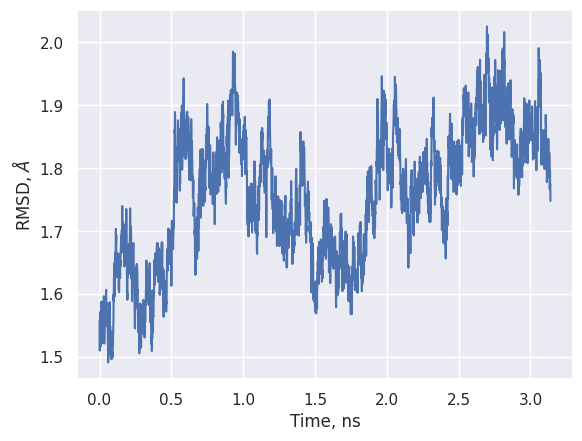

In [14]:
plt.plot(time,rmsd)
plt.xlabel("Time, ns")
plt.ylabel("RMSD, $ \AA $")